In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# 1. Membaca dataset
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df

,VIN,County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10


In [57]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (135038, 17)


In [58]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   VIN                                         135038 non-null  object 
 1   County                                      135030 non-null  object 
 2   City                                        135030 non-null  object 
 3   State                                       135038 non-null  object 
 4   Postal_Code                                 135030 non-null  float64
 5   Model_Year                                  135038 non-null  int64  
 6   Make                                        135038 non-null  object 
 7   Model                                       134789 non-null  object 
 8   Electric_Vehicle_Type                       135038 non-null  object 
 9   Clean_Alternative_Fuel_Vehicle_Eligibility  135038 non-null  object 
 

,Postal_Code,Model_Year,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,2020_Census_Tract
count,135030.000000,135038.000000,135037.000000,135037.000000,134726.000000,1.350380e+05,1.350300e+05
mean,98171.001577,2019.662880,74.591964,1448.407325,29.504379,2.063432e+08,5.297233e+10
std,2450.367211,3.001676,98.744120,9683.658138,14.783780,8.582417e+07,1.635783e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.606305e+08,5.303301e+10
50%,98121.000000,2021.000000,21.000000,0.000000,34.000000,2.059563e+08,5.303303e+10
75%,98370.000000,2022.000000,150.000000,0.000000,43.000000,2.308888e+08,5.305307e+10
max,99701.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [59]:
# Mendeteksi duplikat
duplicate_rows = df[df.duplicated()]
print("Jumlah baris duplikat:", duplicate_rows.shape[0])

# Mendeteksi missing values per kolom
missing_values = df.isnull().sum()
print("Missing values per kolom:\n", missing_values)

Jumlah baris duplikat: 0
Missing values per kolom:
 VIN                                             0
County                                          8
City                                            8
State                                           0
Postal_Code                                     8
Model_Year                                      0
Make                                            0
Model                                         249
Electric_Vehicle_Type                           0
Clean_Alternative_Fuel_Vehicle_Eligibility      0
Electric_Range                                  1
Base_MSRP                                       1
Legislative_District                          312
DOL_Vehicle_ID                                  0
Vehicle_Location                               10
Electric_Utility                                8
2020_Census_Tract                               8
dtype: int64


In [60]:
# Mendeteksi outliers menggunakan metode IQR untuk kolom numerik
# Kolom numerik sesuai tipe data: Postal_Code, Model_Year, Electric_Range, Base_MSRP,
# Legislative_District, DOL_Vehicle_ID, dan 2020_Census_Tract.
numeric_cols = ['Postal_Code', 'Model_Year', 'Electric_Range', 'Base_MSRP', 
                'Legislative_District', 'DOL_Vehicle_ID', '2020_Census_Tract']

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Salin dataframe untuk cleaning
df_clean = df.copy()
for col in numeric_cols:
    df_clean = remove_outliers(df_clean, col)

In [61]:
# Hapus duplikat
df_clean = df_clean.drop_duplicates()

In [62]:
# Hapus baris yang memiliki missing values
df_clean = df_clean.dropna()

In [63]:
# Tampilkan bentuk data setelah cleaning
print("Bentuk data setelah cleaning:", df_clean.shape)

Bentuk data setelah cleaning: (109746, 17)


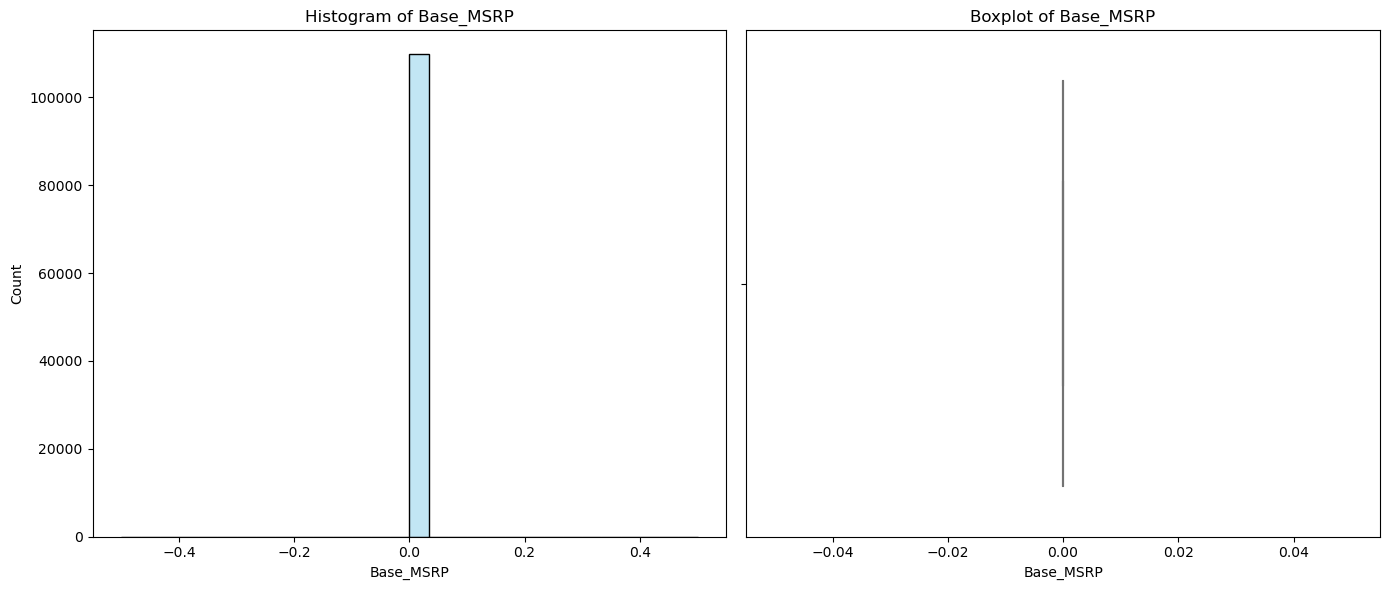

In [64]:
# # Visualisasi: Histogram dan Box Plot untuk kolom Base_MSRP
# plt.figure(figsize=(14,6))
# plt.subplot(1,2,1)
# sns.histplot(df_clean['Base_MSRP'], bins=30, kde=True, color='skyblue')
# plt.title('Histogram of Base_MSRP')

# plt.subplot(1,2,2)
# sns.boxplot(x=df_clean['Base_MSRP'], color='lightgreen')
# plt.title('Boxplot of Base_MSRP')

# plt.tight_layout()
# plt.show()

In [73]:
# Simpan dataset yang telah dibersihkan
df_clean.to_excel("Electric_Vehicle_Population_Data_CLEANED.xlsx", index=False)

In [66]:
# Pastikan menggunakan dataset hasil cleaning: df_clean
# Hitung metrik-metrik
total_vehicles      = df_clean['VIN'].nunique()
total_cities        = df_clean['City'].nunique()
total_models        = df_clean['Model'].nunique()
total_brands        = df_clean['Make'].nunique()
total_census_tracks = df_clean['2020_Census_Tract'].nunique()
total_locations     = df_clean['Vehicle_Location'].nunique()

print(f"Total Vehicles: {total_vehicles}")
print(f"Total Cities: {total_cities}")
print(f"Total Models: {total_models}")
print(f"Total Brands: {total_brands}")
print(f"Total Census Tracks: {total_census_tracks}")
print(f"Total Locations: {total_locations}")

Total Vehicles: 8182
Total Cities: 315
Total Models: 114
Total Brands: 33
Total Census Tracks: 1424
Total Locations: 379


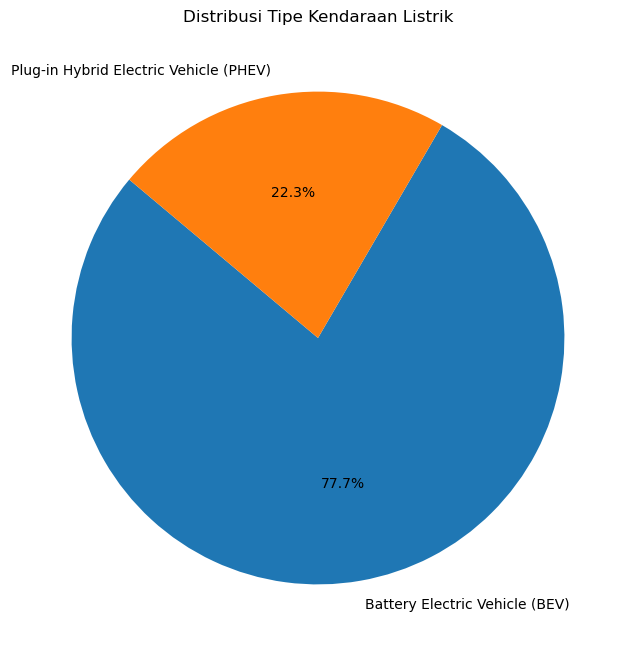

In [67]:
# Pie Chart: Distribusi Tipe Kendaraan (misalnya berdasarkan kolom Electric_Vehicle_Type)
plt.figure(figsize=(8,8))
vehicle_type_counts = df_clean['Electric_Vehicle_Type'].value_counts()
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Tipe Kendaraan Listrik')
plt.show()

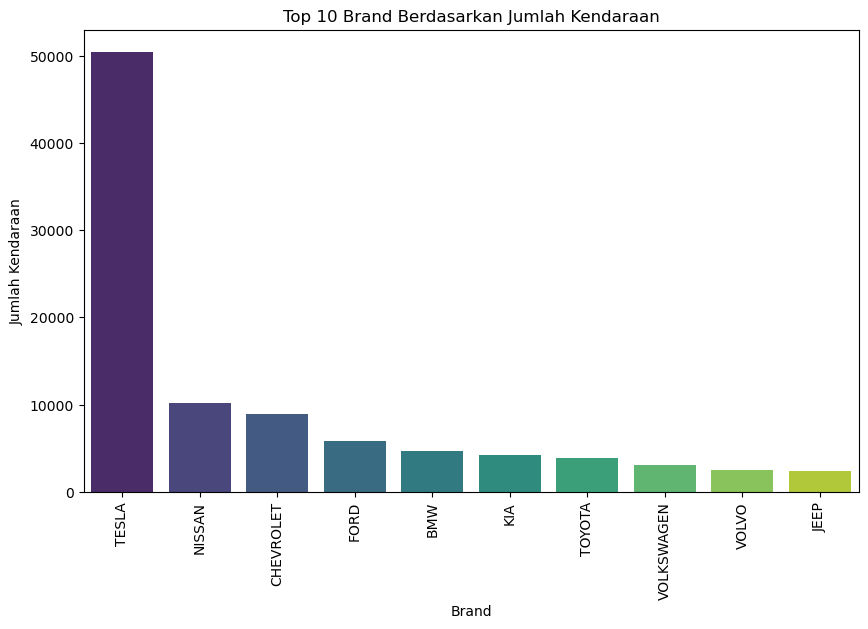

In [68]:
# Bar Chart: Top 10 Brand dengan jumlah kendaraan tertinggi
plt.figure(figsize=(10,6))
top_brands = df_clean['Make'].value_counts().head(10)
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.xlabel('Brand')
plt.ylabel('Jumlah Kendaraan')
plt.title('Top 10 Brand Berdasarkan Jumlah Kendaraan')
plt.xticks(rotation=90)
plt.show()

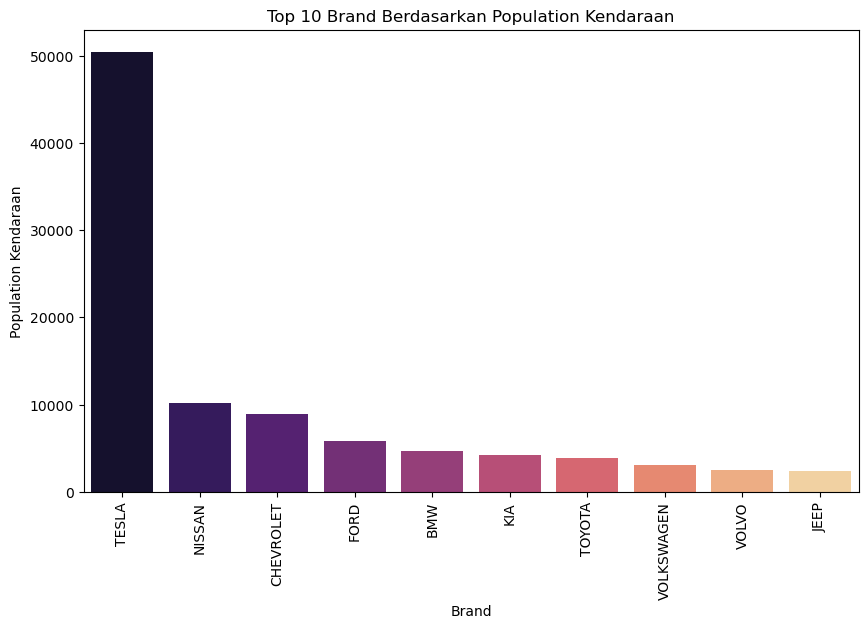

In [69]:
# Jika "Counts Populations Of Vehicles Based On Brands" berbeda, 
# misalnya jika ada agregasi lain (contoh di sini sama dengan count)
plt.figure(figsize=(10,6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='magma')
plt.xlabel('Brand')
plt.ylabel('Population Kendaraan')
plt.title('Top 10 Brand Berdasarkan Population Kendaraan')
plt.xticks(rotation=90)
plt.show()

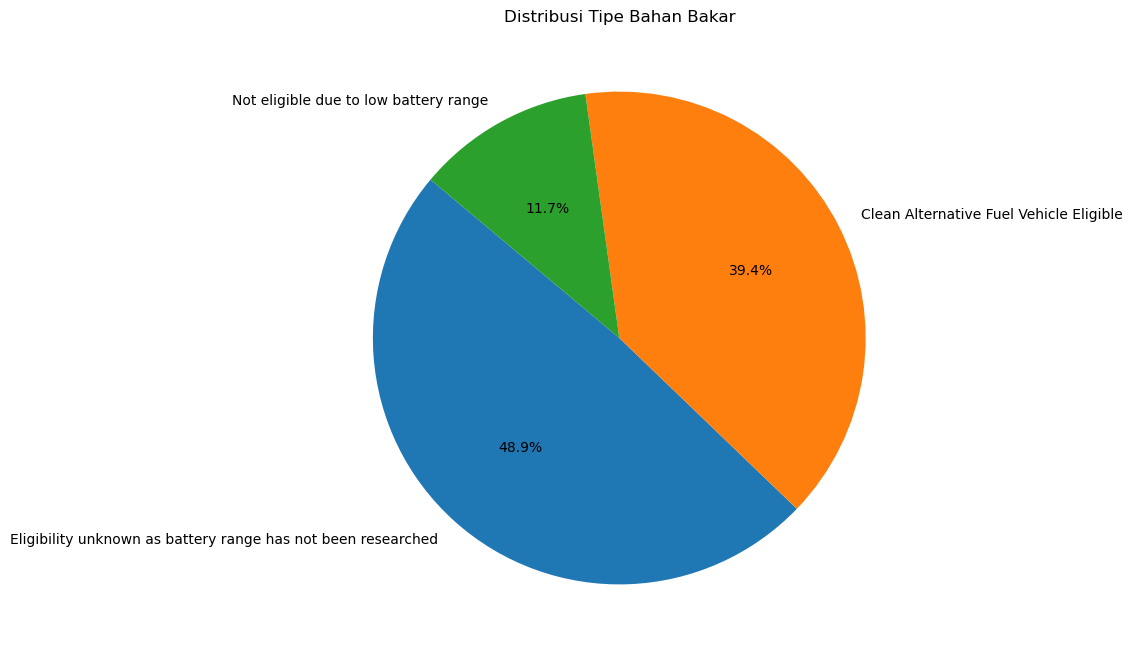

In [70]:
# Pie Chart: Distribusi Tipe Bahan Bakar (misal menggunakan kolom Clean_Alternative_Fuel_Vehicle_Eligibility)
plt.figure(figsize=(8,8))
fuel_type_counts = df_clean['Clean_Alternative_Fuel_Vehicle_Eligibility'].value_counts()
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Tipe Bahan Bakar')
plt.show()

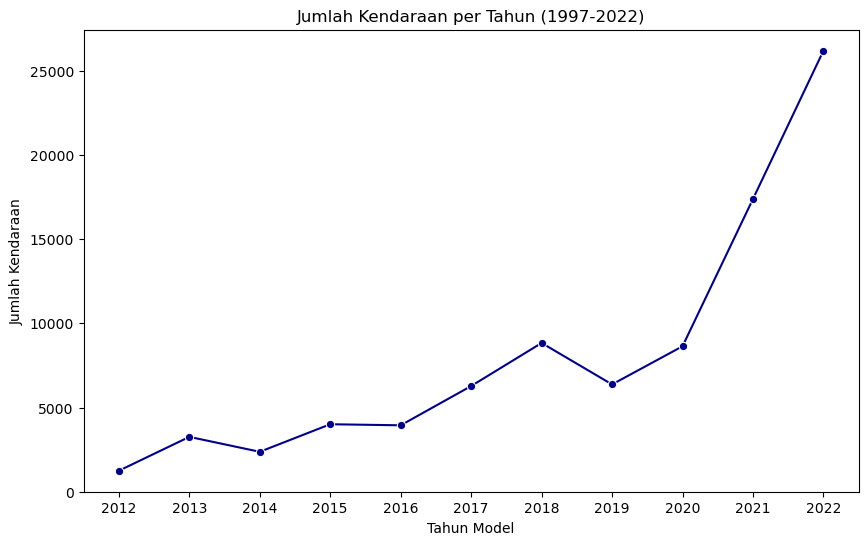

In [71]:
# Time Series: Jumlah Kendaraan per Tahun (Model_Year) antara 1997 dan 2023
# Pastikan Model_Year dalam bentuk numerik
df_clean['Model_Year'] = pd.to_numeric(df_clean['Model_Year'], errors='coerce')
time_series = df_clean[(df_clean['Model_Year'] >= 1997) & (df_clean['Model_Year'] <= 2022)]
year_counts = time_series['Model_Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='darkblue')
plt.xlabel('Tahun Model')
plt.ylabel('Jumlah Kendaraan')
plt.title('Jumlah Kendaraan per Tahun (1997-2022)')
plt.xticks(year_counts.index, rotation=0)
plt.show()

In [72]:
import dash
from dash import dcc, html
import plotly.express as px

# Membuat figure dengan Plotly Express
fig_vehicle_type = px.pie(names=vehicle_type_counts.index, 
                          values=vehicle_type_counts.values, 
                          title='Distribusi Tipe Kendaraan Listrik')

fig_top_brands = px.bar(x=top_brands.index, 
                        y=top_brands.values, 
                        title='Top 10 Brand Berdasarkan Jumlah Kendaraan',
                        labels={'x':'Brand', 'y':'Jumlah Kendaraan'})

fig_fuel_types = px.pie(names=fuel_type_counts.index, 
                        values=fuel_type_counts.values, 
                        title='Distribusi Tipe Bahan Bakar')

fig_time_series = px.line(x=year_counts.index, 
                          y=year_counts.values, 
                          title='Jumlah Kendaraan per Tahun (1997-2023)',
                          labels={'x':'Tahun Model', 'y':'Jumlah Kendaraan'},
                          markers=True)

# Inisialisasi aplikasi Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Dashboard Analisis Data Kendaraan Listrik", style={'textAlign': 'center'}),
    
    html.Div([
        html.Div([
            html.H3(f"Total Vehicles: {total_vehicles}"),
            html.H3(f"Total Cities: {total_cities}"),
            html.H3(f"Total Models: {total_models}"),
            html.H3(f"Total Brands: {total_brands}"),
            html.H3(f"Total Census Tracks: {total_census_tracks}"),
            html.H3(f"Total Locations: {total_locations}")
        ], style={'width': '30%', 'display': 'inline-block', 'verticalAlign': 'top', 'padding': '20px'}),
        
        html.Div([
            dcc.Graph(figure=fig_vehicle_type),
            dcc.Graph(figure=fig_fuel_types)
        ], style={'width': '65%', 'display': 'inline-block'})
    ], style={'display': 'flex'}),
    
    html.Div([
        dcc.Graph(figure=fig_top_brands)
    ], style={'padding': '20px'}),
    
    html.Div([
        dcc.Graph(figure=fig_time_series)
    ], style={'padding': '20px'})
])

if __name__ == '__main__':
    app.run_server(debug=True)